In [4]:
# ACO for TSP
%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np
class City:
    """coordinates of the locations """
    def __init__(self, coords):
        self.x = int(coords[0])
        self.y = int(coords[1])
    
    def distance(self, city):
        """
        Euclidean distance
        """
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

class TSP:
    def __init__(self, filename = None, cities_no = 10):
        """
        Generation of locations or reading the data from a TSPLib file
        """
        if filename is None:
            self.N = cities_no
            self.cities = [City(random.sample(range(100), 2)) for i in range(self.N)];
        else:
            self.N, self.cities = self.___read_TSP_file( filename)
        
    def ___read_TSP_file(self, filename):
        nodelist = []

        # Open input file
        with open(filename, 'r') as infile:

            # Read instance header
            Name = infile.readline().strip().split()[1] # NAME
            FileType = infile.readline().strip().split()[1] # TYPE
            Comment = infile.readline().strip().split()[1] # COMMENT
            Dimension = infile.readline().strip().split(":")[1] # DIMENSION
            EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
            infile.readline()

            # Read node list
            N = int(Dimension)
            for i in range(N):
                coords = infile.readline().strip().split()[1:]
                nodelist.append(City(coords))

        return N, nodelist
    
    def eval(self, tour):
        """Computation of the cost = length of the tour"""
        val = 0
        for i in range(self.N-1):
            val += self.cities[tour[i]].distance(self.cities[tour[i+1]])
        val += self.cities[tour[0]].distance(self.cities[tour[self.N-1]])
        # return val, 0
        return val
    
    def distance(self, city1, city2):
        return self.cities[city1].distance(self.cities[city2])
        
    
    def displayTour(self, tour):
        """plot the tour"""  
        plt.figure(figsize = (16,8))

        plt.axes()
        plt.plot([self.cities[tour[i % self.N]].x for i in range(self.N+1)], [self.cities[tour[i % self.N]].y for i in range(self.N+1)], 'bo-');
        plt.show()

it 2 cost 1302.6789964252719
it 2 cost 1238.0723626289048
it 2 cost 1095.7204336740983
it 3 cost 1053.7304579718927
it 3 cost 1034.9976984406935
it 3 cost 1010.4642537805308
it 4 cost 933.9951730311111
it 4 cost 917.8889459229206
it 4 cost 892.8342723109279
it 4 cost 869.176254071897
it 5 cost 852.2654279940206
it 6 cost 833.2888336691444
it 6 cost 815.8076641168898
it 8 cost 797.008743214244
it 9 cost 785.3631339877527
it 9 cost 772.5899237497606
it 14 cost 752.2573084396557
it 14 cost 743.5783795785426
it 16 cost 740.8137229821917
it 16 cost 721.5942464440651
it 20 cost 716.2783606038025
it 25 cost 703.1418678295823
it 30 cost 687.4864532414371
it 31 cost 660.9919290011532
it 32 cost 633.2074212627219
it 35 cost 627.5331404646295
it 51 cost 613.6765445996884
it 51 cost 608.1460227525852
it 65 cost 601.5311002292353
it 66 cost 574.090083421435
best cost 574.090083421435


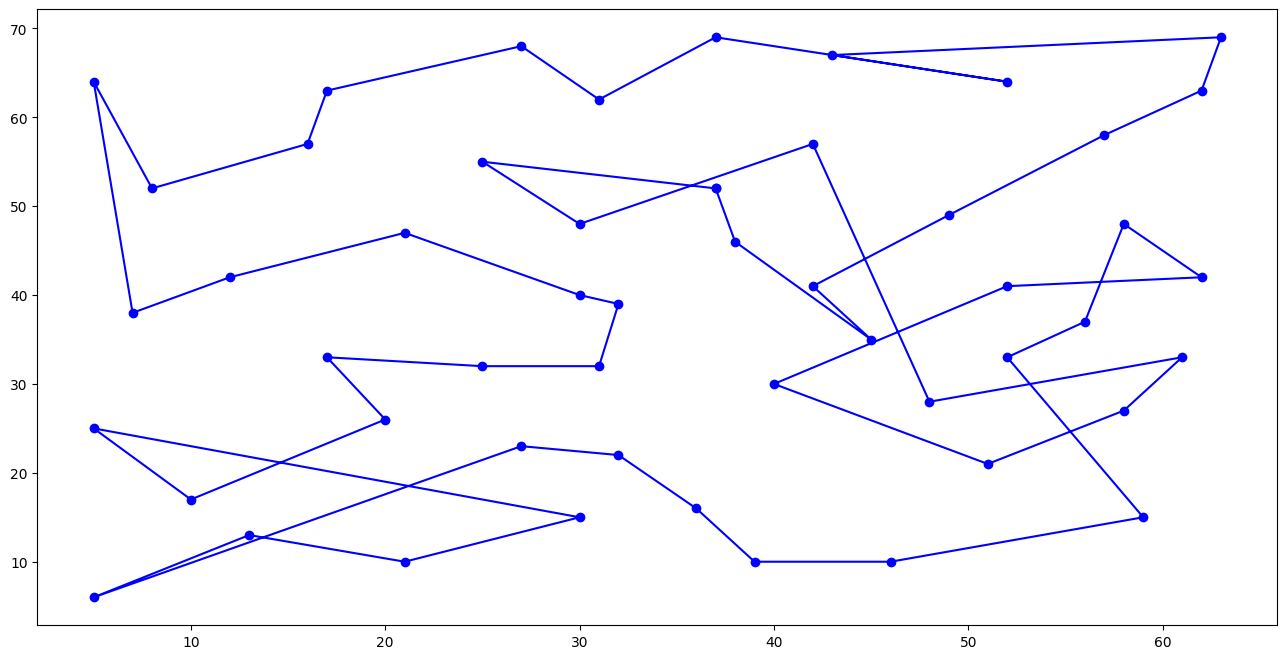

In [5]:
# ACO
class Ant:
    def __init__(self, N):
        self.tour = [0]*N
        self.cost = 0
        self.availableNodes = set([i for i in range (1,N)]) # nodes which have not been visited yet
        #print(self.availableNodes, self.tour)
        
    def nextNode(self, i, newPoz):
        self.tour[i]=newPoz
        self.availableNodes.remove(newPoz)
        
    def __repr__(self):
        return "cost: {} tour:{}".format(self.cost, self.tour)

        
def selectNode(prob):
    # proportional selection of a new node
    i = 0
    s = prob[0]
    u = np.random.rand();
    while u>s:
        i=i+1
        s=s+prob[i]
    return i


def selectNextNode(prob, a, i, tau, alpha, beta):
    probabilities = np.zeros(prob.N)
    suma=0
    for k in a.availableNodes:   
        #print( a.tour[i-1],k)
        #print("tau", tau[a.tour[i-1]][k])
        eta = 1. / prob.distance(a.tour[i-1],k)
        t = (tau[a.tour[i-1]][k]**alpha)*(eta**beta)
        suma += t
        probabilities[k] = t

    for k in a.availableNodes:
        probabilities[k] /= suma
            
    return selectNode(probabilities)

def updatePheromoneMatrix(prob, tau, rho, bestTour):
    # only the best ant updates the tour
    N = prob.N 
    for i in range(N):
        for j in range(N):
            term = 0
            for k in range(N-1):                                            
                if (i ==  bestTour[k]) and (j == bestTour[k+1]):
                    term = 1.0/prob.distance(i,j)
            tau[i][j]=(1-rho)*tau[i][j]+rho*term
                         
                                                     
def ACO(prob, antNr, genMax, alpha, beta, rho):
    # initialization for best tour 
    bestTour = [i for i in range(prob.N)]
    bestCost = prob.eval(bestTour)
    
    #pheromone matrix initialization
    tau = np.random.rand(prob.N, prob.N)
    it = 0
    
    while it < genMax:
        it = it + 1
        # print(it, tau)
        for k in range(antNr):
            a = Ant(prob.N)
            for i in range(1, prob.N): # each and select a new node
                a.nextNode(i, selectNextNode(prob, a, i, tau, alpha, beta))
            a.cost = prob.eval(a.tour)
            updatePheromoneMatrix(prob, tau, rho, a.tour)
            if a.cost < bestCost:
                bestTour = a.tour.copy()                
                bestCost = a.cost
                print("it", it, "cost", bestCost)
        # updatePheromoneMatrix(prob, tau, rho, bestTour)
    return bestTour, bestCost
    
# prob = TSP()
prob = TSP("../../data/tsp/eil51.tsp")

bestTour, bestCost = ACO(prob,20,150,0.5,0.5,0.25)
print("best cost", bestCost)
prob.displayTour(bestTour)